In [9]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv('All_Trials_OPs.csv')
df

,EMD,EMD_error,trial_index,arm_name,units_1,learning_rate,batch_size,trial_status,generation_method,filters_1,...,filters_2,kernel_2,stride_2,pooling_1,pooling_2,filters_3,kernel_3,stride_3,pooling_3,OPs
0,2.270,0.743,0,0_0,32.0,0.093527,200,COMPLETED,Sobol,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5168
1,1.793,0.584,1,1_0,16.0,0.008442,50,COMPLETED,Sobol,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2592
2,1.962,0.674,2,2_0,32.0,0.080212,250,COMPLETED,Sobol,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5168
3,2.012,0.801,3,3_0,32.0,0.024625,300,COMPLETED,Sobol,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5168
4,1.793,0.584,4,4_0,16.0,0.018145,50,COMPLETED,Sobol,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1.574,0.519,25,25_0,16.0,0.016941,50,COMPLETED,GPEI,32.0,...,8.0,5.0,2.0,True,True,32.0,5.0,2.0,True,53992
206,1.564,0.522,26,26_0,16.0,0.016734,100,COMPLETED,GPEI,32.0,...,8.0,5.0,2.0,True,True,32.0,5.0,2.0,True,53992
207,1.564,0.522,27,27_0,16.0,0.016750,100,COMPLETED,GPEI,32.0,...,8.0,5.0,2.0,True,True,32.0,5.0,2.0,True,53992
208,1.564,0.522,28,28_0,16.0,0.016567,100,COMPLETED,GPEI,32.0,...,8.0,5.0,2.0,True,True,32.0,5.0,2.0,True,53992


In [12]:
emd = df.loc[:,"EMD"]
error = df.loc[:,"EMD_error"]
ops = df.loc[:,"OPs"]

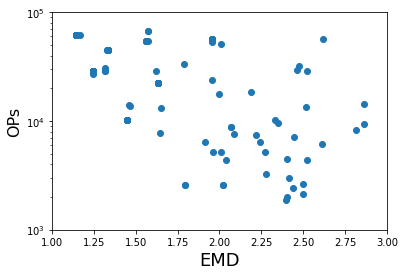

In [25]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.scatter(emd,ops)
ax.set(xlim=(1, 3),
       ylim=(1e3, 1e5))


def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.xlabel('EMD', fontsize=18)
plt.ylabel('OPs', fontsize=16)
plt.savefig('EMDvsOPS.jpg', dpi=1000)

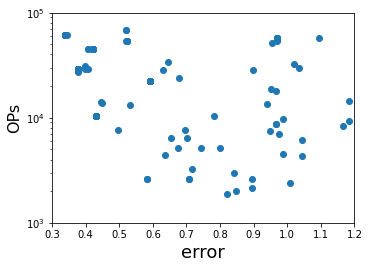

In [21]:
fig, ax = plt.subplots()
ax.scatter(error,ops)
ax.set_yscale('log')
ax.set(xlim=(0.3, 1.2),
       ylim=(1e3, 1e5))
plt.xlabel('error', fontsize=18)
plt.ylabel('OPs', fontsize=16)
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.2)
plt.savefig('EMDerrorvsOPS.jpg', dpi=1000)